In [66]:
import json

# Open the JSON file
with open('data\\vimmsd-train.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)


# Process the duplicated data

In [67]:
# format:
# '0': {'image': '8ae451edcd8ebf697f8763ece249115813149c55733bf8306b971210d48b15d3.jpg',
#   'caption': 'Cô ấy trên mạng vs cô ấy ngoài đời =)))',
#   'label': 'multi-sarcasm'},
#  '1': {'image': '35370ffd6c791d6f8c4ab3dd4363ed468fab41e4824ee9984169f58be672a0b7.jpg',
#   'caption': 'Người tâm linh giao tiếp với người thực tế :)))',
#   'label': 'not-sarcasm'},


# some caption have many image, now create a dict that store the images in the same caption into one

new_data = {}
previous = None
last_id = "0"
for k in data.keys():
    # check if previous caption is the same as current caption
    if previous == data[k]['caption']:
        # add the image to the list
        new_data[last_id]['image'] = new_data[last_id]['image'] + [data[k]['image']]
    else:
        # create a new list
        last_id = k
        new_data[last_id] = {}
        new_data[last_id]['image'] = [data[k]['image']]
        new_data[last_id]['caption'] = data[k]['caption']
        new_data[last_id]['label'] = data[k]['label']
    previous = data[k]['caption']
new_data


{'0': {'image': ['bb934d7d7f7652903c24272d405e4b31c70689cec93f86d5d36f17707c36fceb.jpg'],
  'caption': 'Hãy thực tế lên, đừng kêu ca nữa :)))',
  'label': None},
 '1': {'image': ['449a108232be3d220679d7c500ee0aa3203920c01163190bf900456af85564f6.jpg'],
  'caption': 'Thôi thế cho anh mua gói lạc',
  'label': None},
 '2': {'image': ['2c17cee0245711376b566a65d1a9d25066317fc894fc0a7a98543dada5883e1b.jpg'],
  'caption': 'Chính quyền bang và đơn vị vận hành lưới điện đang vật lộn với tình thế kỳ quặc. Quá nhiều điện mặt trời vào những ngày nắng khi nhu cầu không quá cao dẫn tới giá điện âm\nĐiện mặt trời có nhiều lợi ích tuyệt vời: gần như không tốn chi phí vận hành sau khi xây dựng, không tạo ra ô nhiễm không khí và sản xuất năng lượng mà không cần đốt nhiên liệu hóa thạch. Nhưng một bất lợi chính của nó là Mặt Trời không chiếu sáng mọi lúc.\nCách đây hơn 15 năm, nhóm nghiên cứu ở Phòng thí nghiệm năng lượng tái tạo quốc gia lập mô hình điện mặt trời phổ biến trong tương lai và nhận ra điều 

In [68]:
# save the new data to a new json file, note that also store the emoji, so change the utf
with open('data/vimmsd-public-test-no-repeat.json', 'w', encoding='utf-8') as file:
    json.dump(new_data, file, ensure_ascii=False, indent=4)

In [13]:
import unicodedata

def has_emoji(text):
    emos = []
    for char in text:
        # Check if the character is an emoji
        if unicodedata.category(char).startswith('So'):
            emos += char 
    return len(emos) > 0, set(emos)


In [3]:
text1 = """THỜI ĐẠI TIU-ĐÂY lên ngôi❗️ Chim chuột với chồng bạn ngay sau lưng!
Truy tìm chị vợ áo hoa trong video và muốn nói cho chị rằng:” Chị ơi bạn chị cả chồng chị nắm tay nhau sau lưng chị kìa❗️❗️
Chị chị em em cây cà lem cũng muốn g/i/ậ/t!"""

text2 = "Cô ấy trên mạng vs cô ấy ngoài đời =)))"
text3 = "Để kao giữ xe hắn lại cho,mài đi báo cảnh sát đi 😆😄."

print(has_emoji(text1))  # Output: True
print(has_emoji(text2))  # Output: False
print(has_emoji(text3))  # Output: False


(True, {'❗'})
(False, set())
(True, {'😄', '😆'})


In [16]:
data = new_data

# Emoji 

In [18]:
icon_idx = []
label_map = {
    "not-sarcasm": 0,
    "multi-sarcasm": 1,
    "image-sarcasm": 2,
    "text-sarcasm": 3
}
count_label_emoji = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
map_icon = {
    "not-sarcasm": {},
    "multi-sarcasm": {},
    "image-sarcasm": {},
    "text-sarcasm": {}
}
for i in data.keys():
    check, emos = has_emoji(data[i]['caption'])
    label = data[i]['label']
    if check:
        count_label_emoji[label] += 1
        for emo in emos:
            map_icon[label][emo] = map_icon[label].get(emo, 0) + 1

In [19]:
# export to json file, make the json exported file can store emoji
with open('icon-no-repeat.json', 'w', encoding='utf-8') as f:
    json.dump(map_icon, f, ensure_ascii=False, indent=4)

<BarContainer object of 100 artists>

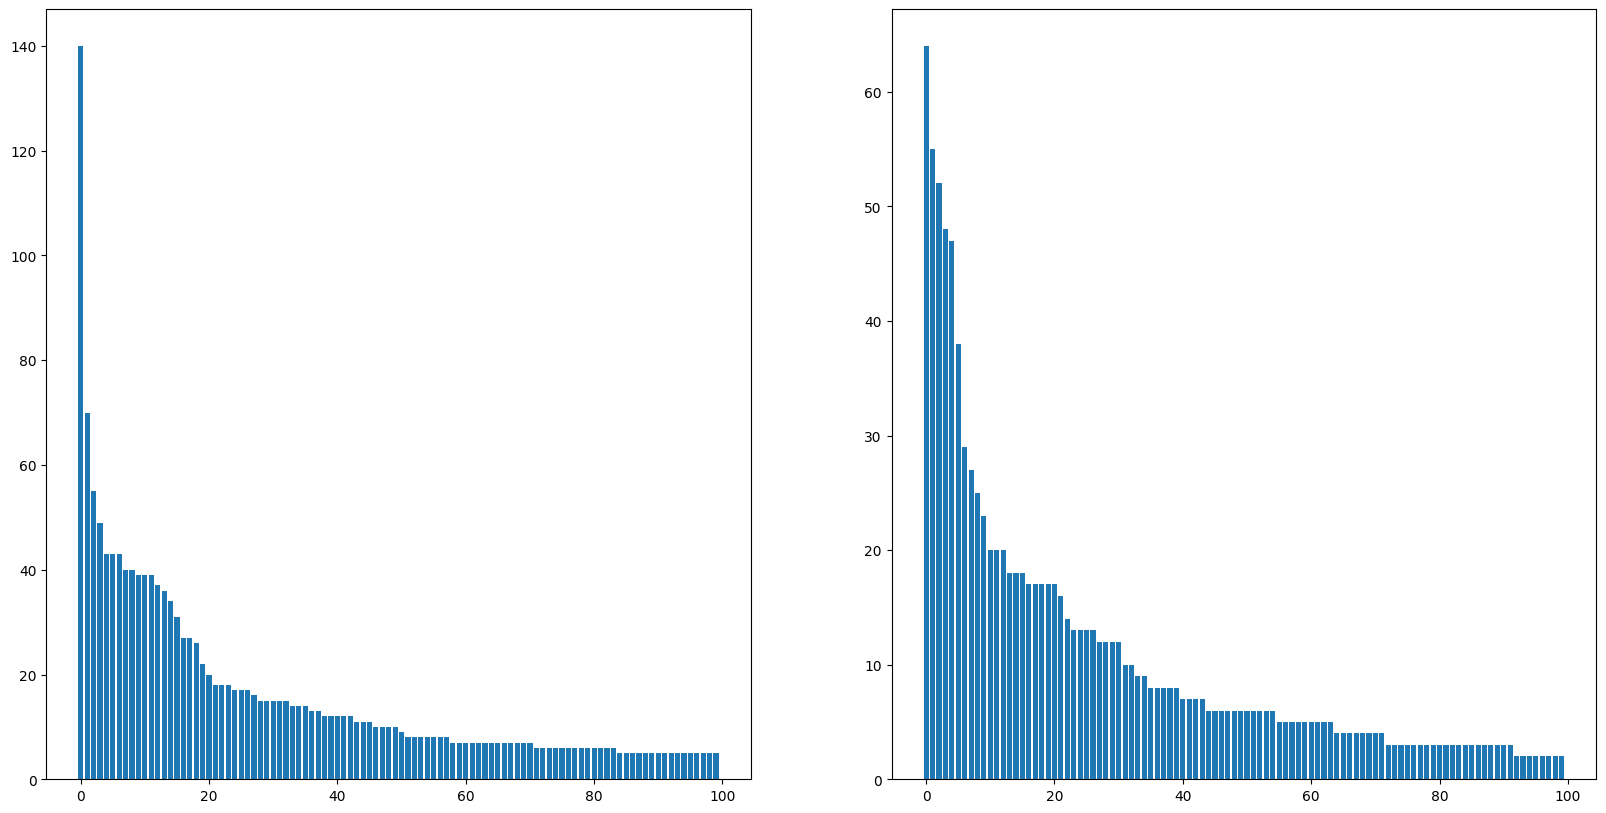

In [20]:
# plot the values 
import matplotlib.pyplot as plt
import numpy as np
# subplot for not and multi sarcasm 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
a = sorted(map_icon["not-sarcasm"].values(),reverse=True)[:100]
plt.bar(range(len(a)), a)

plt.subplot(1, 2, 2)
b = sorted(map_icon["multi-sarcasm"].values(),reverse=True)[:100]
plt.bar(range(len(b)), b)

Choose 25 as threshold for not sarcasm and 10 for multi-sarcasm

In [62]:
emoji_not_sarcasm = []
for k,v in map_icon["not-sarcasm"].items():
    if v >= 15:
        emoji_not_sarcasm.append(k)
        
emoji_multi_sarcasm = []
for k,v in map_icon["multi-sarcasm"].items():
    if v >= 10:
        emoji_multi_sarcasm.append(k)

In [64]:
emoji_list = list(set(emoji_multi_sarcasm).union(set(emoji_not_sarcasm)))
len(emoji_list)

45

In [26]:
map_not_sarcasm = {}
map_sarcasm = {}
for emo in emoji_list:
    map_not_sarcasm[emo] = 0
    map_sarcasm[emo] = 0

In [27]:
for i in data.keys():
    check, emos = has_emoji(data[str(i)]['caption'])
    label = data[str(i)]['label']
    if check:
        for emo in emos:
            if(emo in emoji_list):
                if(label=="not-sarcasm"):
                    map_not_sarcasm[emo] += 1
                else: map_sarcasm[emo]+=1

In [29]:
count = {}
for id,d in data.items():
    label = d["label"]
    if label not in count:
        count[label] = 0
    count[label] += 1
    
count_label_emoji, count

({'not-sarcasm': 1391,
  'multi-sarcasm': 1034,
  'image-sarcasm': 100,
  'text-sarcasm': 17},
 {'multi-sarcasm': 3853,
  'not-sarcasm': 4504,
  'image-sarcasm': 401,
  'text-sarcasm': 58})

In [30]:
number_not_sarcasm = count["not-sarcasm"]
number_sarcasm = len(data) - number_not_sarcasm
number_not_sarcasm, number_sarcasm

(4504, 4312)

In [31]:
# save to a pandas dataframe
import pandas as pd

# 3 cols, the first is emoji, the second is the number of emoji in not sarcasm, the third is the number of emoji in sarcasm

df = pd.DataFrame(columns=["emoji", "not-sarcasm", "sarcasm"])
df["emoji"] = emoji_list
df["not-sarcasm"] = [map_not_sarcasm[emo] for emo in emoji_list]
df["sarcasm"] = [map_sarcasm[emo] for emo in emoji_list]
df["percentage_not_sarcasm"] = np.array(df["not-sarcasm"])/number_not_sarcasm*100
df["percentage_sarcasm"] = np.array(df["sarcasm"])/number_sarcasm*100
# for emo in emoji_list:
    # df = df.append({"emoji": emo, "not-sarcasm": map_not_sarcasm[emo], "sarcasm": map_sarcasm[emo]}, ignore_index=True)

In [32]:
df

,emoji,not-sarcasm,sarcasm,percentage_not_sarcasm,percentage_sarcasm
0,🥹,39,60,0.865897,1.391466
1,😇,8,21,0.177620,0.487013
2,❤,140,49,3.108348,1.136364
3,♥,37,1,0.821492,0.023191
4,😢,20,21,0.444050,0.487013
5,😂,26,67,0.577265,1.553803
6,😎,55,17,1.221137,0.394249
7,🥰,49,29,1.087922,0.672542
8,🔥,70,16,1.554174,0.371058
9,🙁,27,21,0.599467,0.487013


In [65]:
# export the emoji list to a file
with open("emoji_list_no_repeat_larger.txt", "w") as f:
    for emo in emoji_list:
        f.write(emo)
        f.write("\n")

In [34]:
import unicodedata

# char = '❤'
# name = unicodedata.name(char)
# print(name)
for icon in emoji_list:
    print(icon, unicodedata.name(icon))

🥹 FACE HOLDING BACK TEARS
😇 SMILING FACE WITH HALO
❤ HEAVY BLACK HEART
♥ BLACK HEART SUIT
😢 CRYING FACE
😂 FACE WITH TEARS OF JOY
😎 SMILING FACE WITH SUNGLASSES
🥰 SMILING FACE WITH SMILING EYES AND THREE HEARTS
🔥 FIRE
🙁 SLIGHTLY FROWNING FACE
👇 WHITE DOWN POINTING BACKHAND INDEX
🚨 POLICE CARS REVOLVING LIGHT
😃 SMILING FACE WITH OPEN MOUTH
✨ SPARKLES
🙂 SLIGHTLY SMILING FACE
🐧 PENGUIN
😍 SMILING FACE WITH HEART-SHAPED EYES
👉 WHITE RIGHT POINTING BACKHAND INDEX
💀 SKULL
🇳 REGIONAL INDICATOR SYMBOL LETTER N
🤡 CLOWN FACE
🙏 PERSON WITH FOLDED HANDS
☺ WHITE SMILING FACE
🇻 REGIONAL INDICATOR SYMBOL LETTER V
🤣 ROLLING ON THE FLOOR LAUGHING
😅 SMILING FACE WITH OPEN MOUTH AND COLD SWEAT
😏 SMIRKING FACE
👍 THUMBS UP SIGN
😆 SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES
😀 GRINNING FACE
🥲 SMILING FACE WITH TEAR


# Hash tag

In [35]:
# hash tag
# return the whole hash tags
def has_hash_tag(text):
    split_text = text.split()
    res = []
    for t in split_text:
        if t[0] == "#":
           res.append(t) 
    return len(res)>0, res
# count how many hash tag in each label

count_label_hash_tag = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
map_hash_tag = {
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
map_hash_tag_len={
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
for i in data.keys():
    check, hash_tags = has_hash_tag(data[str(i)]['caption'])
    label = data[str(i)]['label']
    map_hash_tag[label]+=(hash_tags)
    map_hash_tag_len[label].append(len(hash_tags))
    if check:
        count_label_hash_tag[label] += 1

count_label_hash_tag

{'not-sarcasm': 873,
 'multi-sarcasm': 883,
 'image-sarcasm': 146,
 'text-sarcasm': 9}

In [36]:
# write the function to count frequency of number in a list python 
def count_freq(arr):
    freq = {}
    for item in arr:
        if item not in freq:
            freq[item] = 0
        freq[item] += 1
    # return sorted map
    return freq


In [37]:
# count the number of each len_hashtag
print("not-sarcasm", count_freq(map_hash_tag_len["not-sarcasm"]))
print("multi-sarcasm", count_freq(map_hash_tag_len["multi-sarcasm"]))
print("image-sarcasm", count_freq(map_hash_tag_len["image-sarcasm"]))
print("text-sarcasm", count_freq(map_hash_tag_len["text-sarcasm"]))

not-sarcasm {0: 3631, 1: 437, 2: 155, 3: 176, 5: 28, 4: 54, 6: 12, 8: 3, 9: 2, 11: 2, 7: 4}
multi-sarcasm {0: 2970, 1: 632, 3: 99, 4: 37, 5: 11, 2: 96, 8: 4, 6: 2, 9: 1, 12: 1}
image-sarcasm {0: 255, 3: 32, 1: 88, 2: 16, 4: 8, 6: 1, 9: 1}
text-sarcasm {0: 49, 2: 3, 3: 2, 1: 3, 5: 1}


In [41]:
print(*map_hash_tag["multi-sarcasm"])
print(*map_hash_tag["not-sarcasm"])
print(*map_hash_tag["image-sarcasm"])
print(*map_hash_tag["text-sarcasm"])

#canhco #canhco #PocaVietNam #sinhnhattriky #bitis40nam #tiepbuoctien #youmedstore #datthuoconline #hangchinhhang #shiptantay #VIFON #GiavịVIFON #CóVIFONlàTếttrònvị #CellphoneS #QuaTet #QuaTangTet #SaleTet #Eyemiru #chon1tubai #Tet2023 #ViettelMoney #Tettanhuong #Tetchominhhaychogiadinh #LixiQR #TràOlongTea+ #AnTetNgon #NheDangSon #MiengTetNaoNangNhat #VLTK #TetVoLam18 #VoLamTruyenKy #TetTrongThienHa #TeTuuVoLam #CellphoneS #galaxys23ultra #CellphoneS #OppoReno8T #TravelokaSalebrat11on #Sốngđậmchấtriêng #Grab #GrabExpress #cellphones #qua83 #CreamfieldsVietnam #PhuQuocUnitedCenter #Beatvn #CreamfieldsVietnam #PhuQuocUnitedCenter #Beatvn #j4f #GalaxyS23Series #LamChuCuocSong #interpool #WMO #WorldMemeOrganization #Interpool #Interpool #tatcalataiHarryPotter #Interpool #Interpool #j4f #interpool #WMO #WorldMemeOrganization #CellphoneS #msigaminggf63 #interpool #LinhTinh #Interpool #ngacnhienchua #concung #Interpool #Interpool #Interpool #Interpool #Interpool #interpool #WMO #WorldMemeOrg

# Hidden icon

In [42]:
# hidden icon

def has_hidden_icon(text):
    # hidden icon is the icon that is not in the unicode, but usually start with ":" and follow by a character
    # for example: :v, :), :(, :))) 
    split_text = text.split()
    res = []
    for t in split_text:
        if t[0] == ":" and len(t) > 1:
            res.append(t)
    return len(res)>0, res

count_label_hidden_icon = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
map_hidden_icon = {
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
map_hidden_icon_len={
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
for i in data.keys():
    check, hidden_icons = has_hidden_icon(data[str(i)]['caption'])
    label = data[str(i)]['label']
    map_hidden_icon[label]+=(hidden_icons)
    map_hidden_icon_len[label].append(len(hidden_icons))
    if check:
        count_label_hidden_icon[label] += 1


In [43]:
count_label_hidden_icon

{'not-sarcasm': 276,
 'multi-sarcasm': 322,
 'image-sarcasm': 20,
 'text-sarcasm': 7}

In [53]:
def count_freq_threshold(arr, threshold=2):
    freq = {}
    for item in arr:
        if item not in freq:
            freq[item] = 0
        freq[item] += 1
    # return sorted map
    return {k: v for k, v in freq.items() if v >= threshold}

In [54]:
# count the number of each len_hashtag
print("not-sarcasm", count_freq_threshold(map_hidden_icon["not-sarcasm"]))
print("multi-sarcasm", count_freq_threshold(map_hidden_icon["multi-sarcasm"]))
print("image-sarcasm", count_freq_threshold(map_hidden_icon["image-sarcasm"]))
print("text-sarcasm", count_freq_threshold(map_hidden_icon["text-sarcasm"]))

not-sarcasm {':)))': 47, ':))': 57, ':))))': 9, ':(((': 7, ':v': 92, ':3': 18, ':&lt;': 3, ':x': 26, ':-jjjjjjjjjjjjjjjj': 2, ':xxxx': 7, ':.': 2, ':xxxxxxxxx': 2, ':-jjjjjjjjj': 2, ':xxx': 2, ':-jjjjj': 2, ':xxxxxx': 2, ':X': 4, ':xxxxx': 3, ':^)': 2, ':V': 2, ':-?': 2, ':)))))': 2, ':((': 2}
multi-sarcasm {':)))': 50, ':))': 90, ':v': 99, ':(((': 2, ':))))': 25, ':3': 11, ':((': 2, ':V': 2, ':&lt;': 2, ':&gt;': 2, ':x': 16, ':X': 2, ':-jjjj': 2, ':)))))': 5, ':-jjjjj': 2, ':-jjjjjj': 2, ':xxxxxxxxxx': 2, ':-j': 2, ':xxxx': 2, ':xxxxxxxxxxx': 2, ':)))))))))': 2, ':))))))': 3}
image-sarcasm {':))': 13, ':v': 5}
text-sarcasm {':)))': 3, ':))': 3}


# Same post

In [57]:
count_duplicated = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
len_duplicate = {
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
for i in data.keys():
    len_duplicate[data[str(i)]["label"]].append(len(data[str(i)]["image"]))
    if len(data[str(i)]["image"]) > 1:
        count_duplicated[data[str(i)]["label"]] += 1
        

In [61]:
print("not-sarcasm", count_freq(len_duplicate["not-sarcasm"]))
print("multi-sarcasm", count_freq(len_duplicate["multi-sarcasm"]))
print("image-sarcasm", count_freq(len_duplicate["image-sarcasm"]))
print("text-sarcasm", count_freq(len_duplicate["text-sarcasm"]))

not-sarcasm {1: 4013, 5: 264, 2: 68, 4: 115, 3: 44}
multi-sarcasm {1: 3722, 3: 18, 2: 27, 5: 66, 4: 20}
image-sarcasm {1: 388, 2: 6, 3: 3, 5: 3, 4: 1}
text-sarcasm {2: 1, 1: 52, 3: 1, 5: 3, 4: 1}
